In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math 
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import math
from tqdm import tqdm

In [118]:
uploaded = files.upload()

Saving ai4i2020.csv to ai4i2020 (2).csv


In [119]:
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#Exploratory Data Analysis and Preprocessing

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

There are a total of 14 columns in the dataset with 12 of them being numerical columns including UDI, and 2 categorical columns including Product ID. To summarize the data even better, we'll be mutating the Machine Failure Type Columns to a single column

In [121]:
print('Null Values in the dataset')
print(df.isnull().sum())

Null Values in the dataset
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


Since there are no null values, we don't need to remove any rows or impute any data based on this criteria

In [122]:
print('Unique Values in Type Column')
print(df['Type'].value_counts())

Unique Values in Type Column
L    6000
M    2997
H    1003
Name: Type, dtype: int64


In [123]:
#Converting the Type Column to Numeric so that it can be used as categorical data
df["Type"]=df["Type"].map( {'L':0 , 'M':1, 'H':2})

In [124]:
print('Number of rows without checking for errors in Target Class and Type:',len(df))
df.loc[df['RNF'] == 1, 'Machine failure']= 1
df = df.drop(df[(df['Machine failure'] == 1) & ((df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0))].index)

print('Number of rows after removing redundancies in Target Class and Type:',len(df))

Number of rows without checking for errors in Target Class and Type: 10000
Number of rows after removing redundancies in Target Class and Type: 9991


In [125]:
data3 = df.copy()

Since there are over 5 output class columns, we are mutating them to just 1 categorical output

In [126]:
data1 = df[df['Machine failure'] == 0]
len(data1)

9643

In [127]:
data2 = df[df['Machine failure'] == 1]
len(data2)

348

In [128]:
data1 = data1.drop(["TWF","HDF","PWF","OSF","RNF"],axis=1)

In [129]:
data2['TWF'] = data2['TWF'].replace(1, "TWF", regex = True)
data2['TWF'] = data2['TWF'].replace(0, "", regex = True)
data2['HDF'] = data2['HDF'].replace(1, "HDF", regex = True)
data2['HDF'] = data2['HDF'].replace(0, "", regex = True)
data2["PWF"] = data2['PWF'].replace(1,"PWF",regex = True)
data2["PWF"] = data2['PWF'].replace(0,"",regex = True)
data2["OSF"] = data2['OSF'].replace(1,"OSF",regex = True)
data2["OSF"] = data2['OSF'].replace(0,"",regex = True)
data2["RNF"] = data2['RNF'].replace(1,"RNF",regex = True)
data2["RNF"] = data2['RNF'].replace(0,"",regex = True)
data2["class"] = data2["TWF"] + data2["HDF"] + data2["PWF"] + data2["OSF"] + data2["RNF"]
mcd = data2[data2['class'].str.len()> 1]
mcd = mcd.drop(["TWF","HDF","PWF","OSF","RNF"],axis=1)
mcd["class"].unique()
mcd['class'] = mcd['class'].str.slice(0,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [130]:
mcd['class'].value_counts()

HDF    115
PWF     91
OSF     78
TWF     46
RNF     18
Name: class, dtype: int64

In [131]:
mcd = mcd.drop(['Machine failure'], axis=1)
mcd.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],class
50,51,L47230,0,298.9,309.1,2861,4.6,143,PWF
69,70,L47249,0,298.9,309.0,1410,65.7,191,PWF
77,78,L47257,0,298.8,308.9,1455,41.3,208,TWF
160,161,L47340,0,298.4,308.2,1282,60.7,216,OSF
161,162,L47341,0,298.3,308.1,1412,52.3,218,OSF


In [132]:
data1['class'] = 'No Failure'

In [133]:
data1 = data1.drop(['Machine failure'], axis=1)

In [134]:
data1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],class
0,1,M14860,1,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,0,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,0,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,0,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,0,298.2,308.7,1408,40.0,9,No Failure


In [135]:
#Merging the Machine Failure dataframe and No Failure dataframe
frames = [data1, mcd]
result = pd.concat(frames)
result = shuffle(result)

In [136]:
#The new data frame
result.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],class
8255,8256,L55435,0,299.0,310.4,1606,31.1,134,No Failure
4897,4898,H34311,2,303.8,312.5,1525,38.0,209,No Failure
6300,6301,L53480,0,301.2,310.7,1517,39.4,107,No Failure
1876,1877,L49056,0,298.3,308.0,1242,62.0,98,No Failure
2719,2720,L49899,0,299.5,309.2,1690,29.2,108,No Failure
2309,2310,L49489,0,299.1,308.6,1611,31.4,161,No Failure
2869,2870,L50049,0,300.8,309.7,1519,35.8,14,No Failure
1736,1737,L48916,0,298.4,307.9,1544,35.9,132,No Failure
6901,6902,L54081,0,301.0,311.7,1547,34.5,152,No Failure
5270,5271,L52450,0,303.5,312.9,1275,64.4,113,No Failure


In [137]:
#Removing the  UDI and Product ID Columns
result = result.drop(['Product ID', 'UDI'], axis = 1)
result.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],class
9742,0,298.9,310.2,1623,37.2,177,No Failure
3372,0,301.4,310.8,1431,44.3,21,No Failure
8114,2,300.4,311.8,2496,13.5,5,No Failure
9289,0,298.2,308.9,1367,45.0,85,No Failure
3567,0,301.8,310.5,1548,34.1,93,No Failure


In [138]:
data3 = data3.drop(["TWF","HDF","PWF","OSF","RNF", 'Product ID', 'UDI'],axis=1) #Used for Logistic Regression

#Visualizing the new data

In [139]:
result.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,0.500150,300.004634,310.005385,1538.804124,39.985377,107.942648
std,0.671287,2.000300,1.483990,179.321027,9.969029,63.656648
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,1.000000,301.500000,311.100000,1612.000000,46.700000,162.000000
max,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000


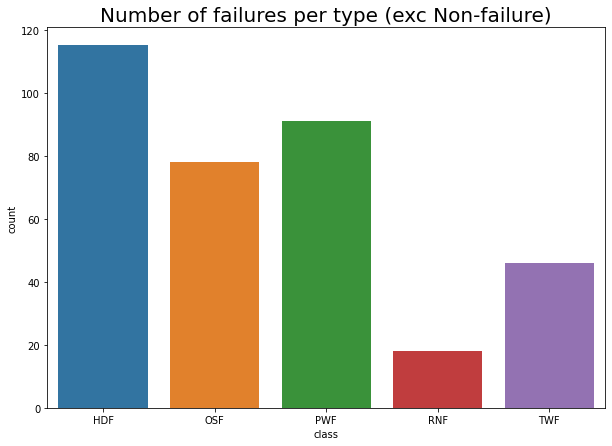

In [140]:
plt.figure(figsize = (10, 7))
sns.countplot(x = result["class"].where(result['class']!='No Failure'))
plt.title("Number of failures per type (exc Non-failure)", fontsize = 20)
plt.show()

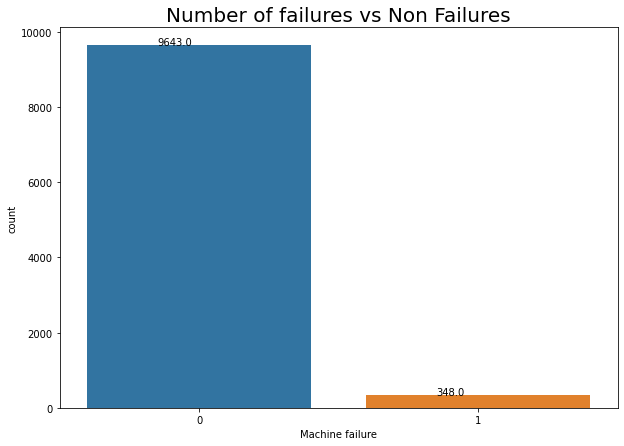

In [141]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x = df["Machine failure"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#0 includes No Failure Class and 1 indicates Failure Class
plt.title("Number of failures vs Non Failures", fontsize = 20)
plt.show()

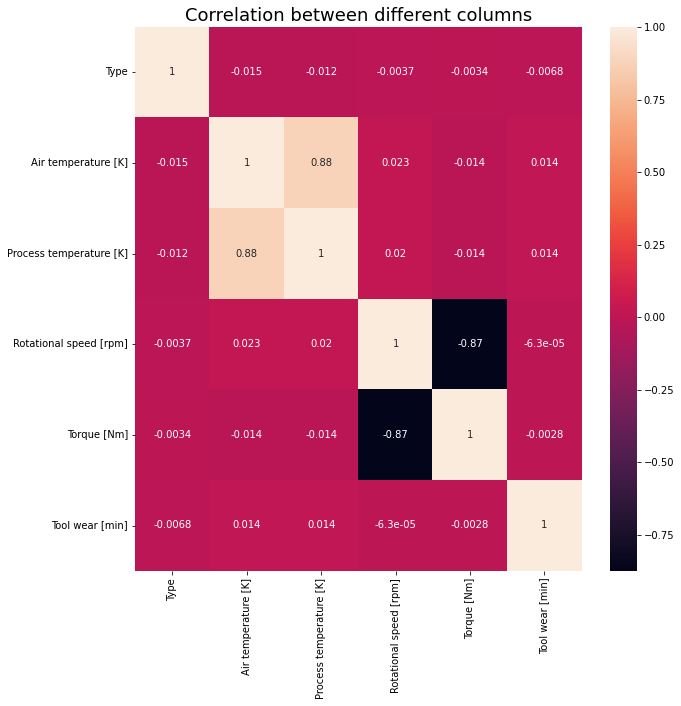

In [142]:
cor = pd.DataFrame(result, columns = ['Type',	'Air temperature [K]',	'Process temperature [K]',	'Rotational speed [rpm]',	'Torque [Nm]', 	'Tool wear [min]'])
plt.figure(figsize = (10,10.))
sns.heatmap(cor.corr(), annot = True)
plt.title('Correlation between different columns', fontsize = 18)
plt.show()

In [143]:
#result = result.drop(['Process temperature [K]'], axis=1)
#Since we have a very few columns to work on, we won't be dropping any columns

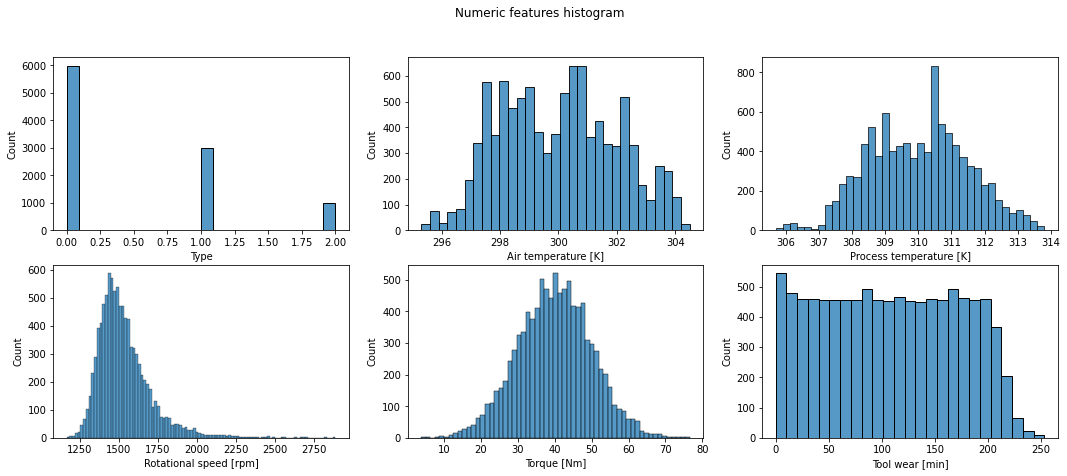

In [144]:
features = [col for col in result.columns
            if result[col].dtype=='float64' or result[col].dtype =='int64']
num_features = [feature for feature in features if result[feature].dtype=='float64' or result[feature].dtype=='int64']
# Histograms of numeric features
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features histogram')
for j, feature in enumerate(num_features):
    sns.histplot(ax=axs[j//3, j-3*(j//3)], data=result, x=feature)
plt.show()

#It says an Index Error but that shouldn't be the case. The Image of Histogram is as expected

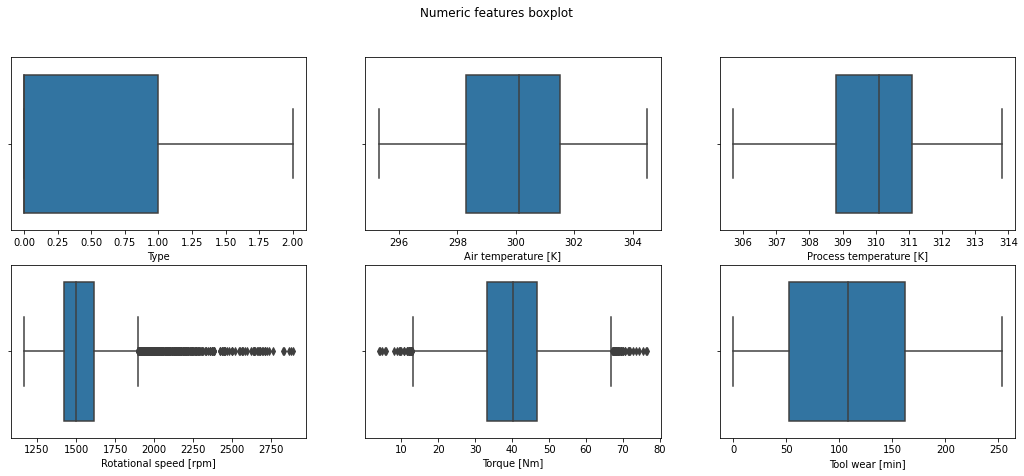

In [145]:
# boxplot of numeric features
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,7))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sns.boxplot(ax = axs[j//3, j-3*(j//3)], data=result, x = feature)
plt.show()

The box plots are used to highlight the outliers in our input data. In case of Torque, the outliers are detected specifically on both the ends indicating a gaussian distribution which can be confirmed using the histogram above. In case of Rotational speed, the distribution seems skewed making it highly unlikely that data points with high rotational speed would fail.

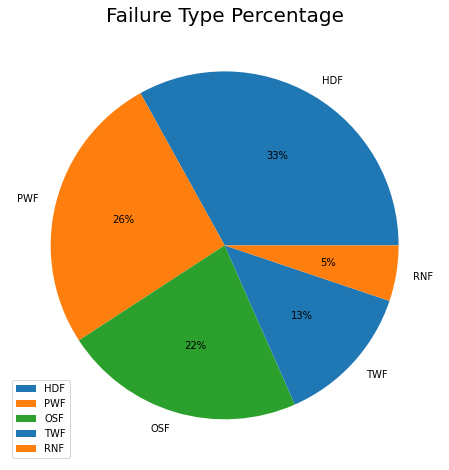

In [146]:
#Pie chart of Type percentage
pie = result.loc[result['class'] != 'No Failure']
value = pie['class'].value_counts()
Type_percentage = 100*value/pie.where(pie['class'] !='No Failure').shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.figure(figsize = (8,8))
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Failure Type Percentage', fontsize = 20)
plt.legend()
plt.show()

#Resampling the data

An important aspect of our dataset considering the second bar chart mentioned above is that there is a very low presence of Machine Failures in the dataset making only about 3.49% of the cleaned dataset. The pie chart plotted below reveals even more imbalance in the data which calls for resampling the data. If there is any imbalance in the data, Machine Learning Models' training as well as testing process could give out misleading outputs. Hence in order to reduce the bias towards Non Failure data, we augment the data with more rows using SMOTE Technique which gives equal weightage to all the output classes of a dataset (6 in this case).

#Encoding the Class column

In [147]:
result["class"] = result["class"].map( {'No Failure':0 , 'HDF':1, 'PWF':2,'OSF':3, 'TWF':4, 'RNF':5})

In [148]:
x = result.iloc[:, :-1]
y = result.iloc[:, -1]

In [149]:
smote = SMOTE(k_neighbors=10)

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 9643, 1: 115, 2: 91, 3: 78, 4: 46, 5: 18})
Resampled dataset shape: Counter({0: 9643, 1: 9643, 3: 9643, 2: 9643, 5: 9643, 4: 9643})


In [150]:
x_smote = (x_smote - np.min(x_smote)) / (np.max(x_smote) - np.min(x_smote)).values 

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [152]:
#For Logistic Binary Classification
# x1 = data3.iloc[:, :-1]
# y1 = data3.iloc[:, -1]
# smote1 = SMOTE(k_neighbors=10)

# # fit target and predictor variable
# x_smtoe , y_smtoe = smote1.fit_resample(x1, y1)

# print('Original dataset shape:', Counter(y1))
# print('Resampled dataset shape:', Counter(y_smtoe))

In [153]:
# x_smtoe = (x_smtoe - np.min(x_smtoe)) / (np.max(x_smtoe) - np.min(x_smtoe)).values 

In [154]:
# x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smtoe, y_smtoe, test_size=0.2, random_state=42)

In [155]:
class PCA1():
  def __init__(self, data, reduced_feature):
    self.reduced_feature = reduced_feature
    self.data = data

  def mean_X(self, data):
    return data - np.mean(data, axis = 0)

  def cov(self, data):
    return np.cov(self.mean_X(data), rowvar = False)

  def eigen_value(self, data):
    eigenval, eigenvec = np.linalg.eigh(self.cov(data))
    return eigenval, eigenvec

  def topn_feature(self):
    val, vec = self.eigen_value(self.data)
    sorted_indexes = np.argsort(val)[::-1]

    sorted_val = val[sorted_indexes]
    n_f = self.reduced_feature

    sorted_eigenvec = vec[:,sorted_indexes]

    return sorted_eigenvec[:,:n_f]

  def transform(self):
    data_reduced = np.dot(self.topn_feature().transpose(), self.mean_X(self.data).transpose()).transpose()
    return data_reduced

  def plot(self):
    val, vec = self.eigen_value(self.data)
    sorted_eval = val[::-1]/sum(val)*100
    plt.bar(np.arange(len(sorted_eval)),sorted_eval)
  
  def variance(self):
    val, vec = self.eigen_value(self.data)
    sorted_eval = val[::-1]/sum(val)
    return sum(sorted_eval[:self.reduced_feature])*100

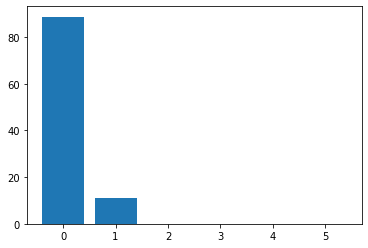

In [156]:
pca = PCA1(x.values, reduced_feature = 2)
reduced_data = pca.transform()
reduced_data.shape
pca.plot()

In [157]:
var = round(pca.variance(), 2)

print('Variance of the dataset:', var)

Variance of the dataset: 99.92


As per the results above, we can see that just 2 principal components capture majority of the variance after performing PCA.

#Logistic Regression

In [158]:
smote2 = SMOTE(k_neighbors=10)

# fit target and predictor variable
x_smote1 , y_smote1 = smote2.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_smote1))

Original dataset shape: Counter({0: 9643, 1: 115, 2: 91, 3: 78, 4: 46, 5: 18})
Resampled dataset shape: Counter({0: 9643, 1: 9643, 3: 9643, 2: 9643, 5: 9643, 4: 9643})


In [159]:
x2 = (x_smote1 - np.min(x_smote1)) / (np.max(x_smote1) - np.min(x_smote1)).values

In [160]:
np.unique(y_smote1)

array([0, 1, 2, 3, 4, 5])

In [161]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_e = enc.fit_transform(np.array(y_smote1.values.reshape(-1,1))).toarray()
y_e

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [162]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y_e,test_size = 0.2, random_state = 42)

x_train2 = x_train2.T
x_test2 = x_test2.T
y_train2 = y_train2.T
y_test2 = y_test2.T

In [163]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [164]:
y_test2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [165]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
    
def sigmoid(z):
    y_head = 1 / (1+np.exp(-z))
    return y_head

In [166]:
def forward_backward_propagation(w,b,x_train2,y_head):
    z = np.dot(w.T, x_train2) + b
    y_head = sigmoid(z)
    loss = -y_train2 * np.log(y_head) - (1-y_train2) * np.log(1-y_head)
    cost = (np.sum(loss)) / x_train2.shape[1]
    derivative_weight = (np.dot(x_train2, ((y_head - y_train2).T)))//x_train2.shape[1]
    derivative_bias = np.sum(y_head - y_train2)/x_train2.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost,gradients

In [167]:
def update(w, b, x_train2, y_train2, learning_rate, iterations):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train2, y_train2)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
          cost_list2.append(cost)
          index.append(i)
          #print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [168]:
np.where(y_train2 == 1)[0]

array([0, 0, 0, ..., 5, 5, 5])

In [169]:
def logistic_regression(x_train2, y_train2, x_test2, y_test2, learning_rate, iterations):
    dimension =  x_train2.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train2, y_train2, learning_rate,iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test2)
    y_pred = np.where(y_prediction_test == max(y_prediction_test))[0]
    y_true = np.where(y_test2 == 1)[0]
    print("Test Accuracy: {}%".format(round(100- np.mean(np.abs(y_prediction_test - y_test2))* 100),3))
    print("F1 score: {}%".format(round(f1_score(y_true, y_pred, average='micro')*100),3))
    print('Precision: {}%'.format(round(precision_score(y_true, y_pred, average='micro')*100),3))
    print('Recall: {}%'.format(round(recall_score(y_true, y_pred, average='micro')*100),3))

In [170]:
y_true = np.where(y_test2 == 1)[0]
y_true.shape

(11572,)

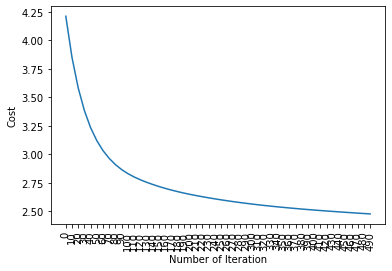

Test Accuracy: 81%
F1 score: 17%
Precision: 17%
Recall: 17%


In [171]:
logistic_regression(x_train2, y_train2, x_test2, y_test2,learning_rate = 0.01, iterations = 500)

#Gaussian Naive Bayes

In [172]:
class  GaussianNB:
	def __init__(self):
		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):
		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]
		for feature in self.features:
			self.likelihoods[feature] = {}
			for outcome in np.unique(self.y_train):
				self.likelihoods[feature].update({outcome:{}})
				self.class_priors.update({outcome: 0})
		self._calc_class_prior()
		self._calc_likelihoods()

	def _calc_class_prior(self):
		for outcome in np.unique(self.y_train):
			outcome_count = sum(self.y_train == outcome)
			self.class_priors[outcome] = outcome_count / self.train_size

	def _calc_likelihoods(self):
		for feature in self.features:
			for outcome in np.unique(self.y_train):
				self.likelihoods[feature][outcome]['mean'] = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].mean()
				self.likelihoods[feature][outcome]['variance'] = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].var()


	def predict(self, X):
		results = []
		X = np.array(X)
		for query in X:
			probs_outcome = {}
			for outcome in np.unique(self.y_train):
				prior = self.class_priors[outcome]
				likelihood = 1
				evidence_temp = 1
				for feat, feat_val in zip(self.features, query):
					mean = self.likelihoods[feat][outcome]['mean']
					var = self.likelihoods[feat][outcome]['variance']
					likelihood *= (1/math.sqrt(2*math.pi*var)) * np.exp(-(feat_val - mean)**2 / (2*var))
				posterior_numerator = (likelihood * prior)
				probs_outcome[outcome] = posterior_numerator
			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)
		return np.array(results)

	def evaluate(self, y,y_hat):
		y = (y==1)
		y_hat = (y_hat == 1)
		acc = sum(y == y_hat)/ len(y)
		precision = (y & y_hat).sum()/y_hat.sum()
		recall = (y*y_hat).sum()/y.sum()
		fsc = 2*(precision*recall)/(precision+recall)
		return acc,fsc, recall, precision

In [173]:
clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
test_acc, fscore, recall, precision = clf.evaluate(y_test, np.array(y_pred))

print('Accuracy:',round(test_acc,3))
print('F1 Score:',round(fscore,3))
print('Precision:',round(precision,3))
print('Recall:',round(recall,3))

Accuracy: 0.946
F1 Score: 0.848
Precision: 0.79
Recall: 0.915


#Neural Network

In [174]:
input_nodes = 6
hidden_nodes = 12
output_nodes = 6

epochs = 500
learning_rate = 0.01

In [175]:
Weight1 = tf.Variable(tf.random.normal([input_nodes, hidden_nodes], stddev = 0.03), name = 'Weight1')
Bias1 = tf.Variable(tf.random.normal([hidden_nodes]), name = 'Bias1')

Weight2 = tf.Variable(tf.random.normal([hidden_nodes,output_nodes], stddev = 0.03), name = 'Weight2')
Bias2 = tf.Variable(tf.random.normal([output_nodes]), name = 'Bias2')

def neural_net(x_input, Weight1, Bias1, Weight2, Bias2):
    x_input = tf.reshape(x_input, (x_input.shape[0], -1))
    x = tf.add(tf.matmul(tf.cast(x_input, tf.float32), Weight1), Bias1)
    x = tf.nn.relu(x)
    logits = tf.add(tf.matmul(x, Weight2), Bias2)
    return logits

def loss_fn(logits, labels):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))
    return cross_entropy

def evaluate(y,y_hat):
  y = (y == 1)
  y_hat = (y_hat == 1)
  acc = sum(y == y_hat)/ len(y) 
  precision = (y & y_hat).sum()/y_hat.sum()
  recall = (y * y_hat).sum()/y.sum()
  fsc = 2*(precision * recall)/(precision + recall)
  return acc, fsc, recall, precision
optimizer = tf.keras.optimizers.Adam()

In [177]:
for epoch in range(epochs):
    avg_loss = 0
    batch_x = tf.Variable(x_train)
    batch_y = tf.Variable(y_train)
    batch_y = tf.one_hot(batch_y, output_nodes)
    with tf.GradientTape() as tape:
        logits = neural_net(batch_x, Weight1, Bias1, Weight2, Bias2)
        loss = loss_fn(logits, batch_y)
    gradients = tape.gradient(loss, [Weight1, Bias1, Weight2, Bias2])
    optimizer.apply_gradients(zip(gradients, [Weight1, Bias1, Weight2, Bias2]))
    avg_loss += loss 
    test_logits = neural_net(x_test, Weight1, Bias1, Weight2, Bias2)
    max_idxs = tf.argmax(test_logits, axis=1)
    test_acc, f1score, recall, precision = evaluate(y_test, np.array(max_idxs))
    if epoch%100 == 0:
      print(f"Epoch: {epoch + 1}, loss={avg_loss:.3f}, Accuracy={test_acc:.3f}")
      print("F1 Score:", round(f1score,3))
      print("Precision:", round(precision,3))
      print('Recall:', round(recall,3))

Epoch: 1, loss=1.536, Accuracy=0.795
F1 Score: 0.572
Precision: 0.435
Recall: 0.835
Epoch: 101, loss=1.452, Accuracy=0.821
F1 Score: 0.605
Precision: 0.473
Recall: 0.84
Epoch: 201, loss=1.367, Accuracy=0.849
F1 Score: 0.65
Precision: 0.523
Recall: 0.859
Epoch: 301, loss=1.287, Accuracy=0.870
F1 Score: 0.689
Precision: 0.567
Recall: 0.877
Epoch: 401, loss=1.216, Accuracy=0.886
F1 Score: 0.72
Precision: 0.602
Recall: 0.898
